# Project 4
Ming Tang

This is my 4th project at Metis/Chicago. In this project, I did the following analysis
1. analyzed the text data of hotel review
2. predict the sentiment of the review content
3. build a recommender based on the topic modeling on the review content

### Import packages

In [1]:
# for plot
%matplotlib inline
import matplotlib.pyplot as plt

# Display full output in Jupyter, not only last result.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Pandas
import numpy as np
import pandas as pd

### Read data
* The dataset is downloaded from Kaggle and uploaded to my GitHub.
* Original source: https://www.kaggle.com/datafiniti/hotel-reviews/data

In [2]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/tangming2008/datasets/master/datasets/metis_class/7282_1.csv')
df_raw.columns = ['address', 'categories', 'city', 'country', 'latitude', 'longitude', 'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded', 'reviews.doRecommend', 'reviews.id', 'reviews.rating', 'reviews.text', 'reviews.title','reviews.userCity','reviews.username','reviews.userProvince']
cols = ['categories', 'city', 'name', 'province', 'reviews.rating', 'reviews.text', 'reviews.title']
df_raw = df_raw.loc[:,cols]
df_raw.columns = ['categories', 'city', 'hotel', 'province', 'reviews_rating', 'reviews_text', 'reviews_title']
# df_raw.head(2)
df = df_raw
df = df[pd.notnull(df['reviews_rating'])]
df = df[pd.notnull(df['reviews_text'])]
df = df[pd.notnull(df['province'])]
df = df[pd.notnull(df['hotel'])]
# df = df[df['province'] == 'IL']

In [3]:
# df.groupby('hotel')['reviews_rating'].mean().sort_values(ascending = False)[:5]

### Exploratory Data Analysis

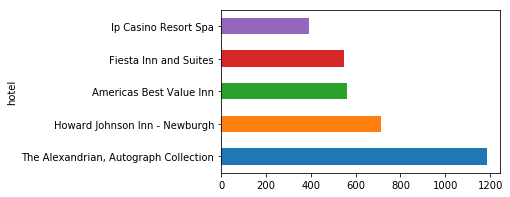

In [4]:
top = 5

# How many counts for each hotel
df_hotel = df.groupby('hotel')['reviews_title'].count()
df_hotel = df_hotel.sort_values(ascending = False)[:top]
# type(df_hotel)
# df_hotel.head()
df_hotel.plot(kind = 'barh', figsize=(5, 3))

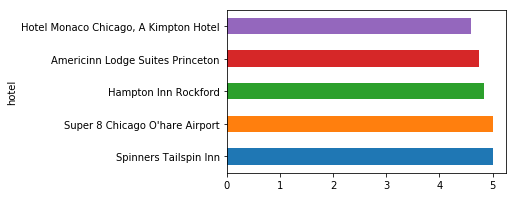

In [5]:
# Top hotels with the highest rate
df_hotel_top = df.groupby('hotel')['reviews_rating'].mean()
df_hotel_top_IL = df[df['province'] == 'IL'].groupby('hotel')['reviews_rating'].mean()
df_hotel_top_IL = df_hotel_top_IL.sort_values(ascending = False)[:top]
df_hotel_top_IL.plot(kind = 'barh', figsize=(5, 3))

Get a list of hotels
* we can either look through the dataframe (column) or the groupbyed series (index)

In [8]:
list_hotels = []
for x, y in df.groupby('hotel'):
    # print('x --', x)
    # print('y --', y)
    list_hotels.append(x)
    
print('How many hotels in total? --', len(list_hotels))

list_hotels2 = []
for hotel in df_hotel_top.index:
    # print(hotel)
    list_hotels2.append(hotel)
    
# len(list_hotels2)

How many hotels in total? -- 792


Word Cloud for showing all hotels

(-0.5, 399.5, 199.5, -0.5)

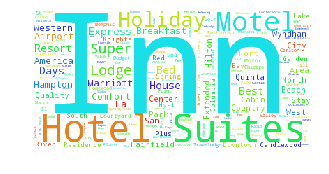

In [9]:
from wordcloud import WordCloud, STOPWORDS

cloud_text = ' '.join([hotel for hotel in list_hotels])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color = 'white').generate(cloud_text)
plt.figure(figsize=(5,3))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Result-1: Sentiment Analysis & Predictions
* Use TextBlob to predict the sentiment scores based on the review content and compare with given review rate

In [10]:
df_senti = df[df['province'] == 'IL']

# df_senti[df_senti[['review']].apply(lambda x: x[0].isdigit(), axis=1)]
# df['Top4'] = df['Rank'].apply(lambda x: 1 if x < 5 else 0)
df_senti.head(2)

,categories,city,hotel,province,reviews_rating,reviews_text,reviews_title
2596,Hotels,Westmont,Extended Stay America - Chicago - Westmont - O...,IL,2.0,Hotel amenities are really not good. We took e...,Below average
2597,Hotels,Westmont,Extended Stay America - Chicago - Westmont - O...,IL,5.0,It was relaxing,great day at extended stay


In [11]:
from textblob import TextBlob

list_response = []
list_score = []
list_score_pos_nag = []

for item in df_senti['reviews_rating']:
    if item < 2.5:
        list_response.append(-1)
    if item >= 2.5:
        list_response.append(1)

text = 'reviews_text'

for item in df_senti[text]:
    score = TextBlob(item).sentiment[0]
    list_score.append(score)
    if score > 0:
        list_score_pos_nag.append(1)
    if score <= 0:
        list_score_pos_nag.append(-1)

print('len(list_response) ---', len(list_response))
print('len(list_score) ---', len(list_score))
print('len(list_score_pos_nag) ---', len(list_score_pos_nag))
      
df_senti['response'] = pd.Series(list_response).values
df_senti['senti_score'] = pd.Series(list_score).values
df_senti['senti_pos_nag'] = pd.Series(list_score_pos_nag).values

len(list_response) --- 586
len(list_score) --- 586
len(list_score_pos_nag) --- 586


/Users/MingTang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/MingTang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/MingTang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [12]:
df_senti_review_rate = df_senti.groupby('hotel')['reviews_rating'].agg(['min', 'max','count','mean'])
df_senti_sentiment_score = df_senti.groupby('hotel')['senti_score'].agg(['min', 'max','count','mean'])

In [14]:
df_senti.head(2)

,categories,city,hotel,province,reviews_rating,reviews_text,reviews_title,response,senti_score,senti_pos_nag
2596,Hotels,Westmont,Extended Stay America - Chicago - Westmont - O...,IL,2.0,Hotel amenities are really not good. We took e...,Below average,-1,-0.266667,-1
2597,Hotels,Westmont,Extended Stay America - Chicago - Westmont - O...,IL,5.0,It was relaxing,great day at extended stay,1,0.000000,-1


### Confusion matrix
* Performed binary predictions (positive or negative) and ploted in the confusion matrix

In [15]:
a = 0
b = 0
c = 0
d = 0
for index, value in enumerate(list_score_pos_nag):
    # print(index)
    # print('score--', list_score[index])
    # print('response --', list_response[index])
    if (list_score_pos_nag[index] == 1 and list_response[index] == 1):
        a = a + 1
    if (list_score_pos_nag[index] == 1 and list_response[index] == -1):
        b = b + 1
    if (list_score_pos_nag[index] == -1 and list_response[index] == 1):
        c = c + 1
    if (list_score_pos_nag[index] == -1 and list_response[index] == -1):
        d = d + 1
print('a --', a, '\nb --', b, '\nc --',c ,'\nd --', d)

a -- 449 
b -- 31 
c -- 56 
d -- 50


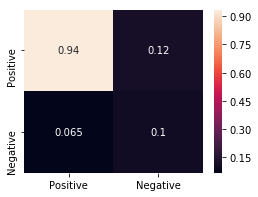

In [16]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[a,c], 
        [b,d]]

def normalize(v):
    norm=np.linalg.norm(v, ord=1)
    if norm==0:
        norm=np.finfo(v.dtype).eps
    return v/norm

array = normalize(array)

df_cm = pd.DataFrame(array, index = [i for i in ['Positive', 'Negative']],
                  columns = [i for i in ['Positive', 'Negative']])
plt.figure(figsize = (4,3))
sn.heatmap(df_cm, annot=True)

### Plots for comparison
1. top N hotels with highest review rates
2. top N hotels with highest sentiment scores (predicted based on the content)

NOTE: hotels with < 10 reviews were excluded

In [17]:
list_hotels_IL = []
for hotels in df_senti['hotel']:
    list_hotels_IL.append(hotel)

print('How many hotels in IL? Answer: ', len(list_hotels_IL))

How many hotels in IL? Answer:  586


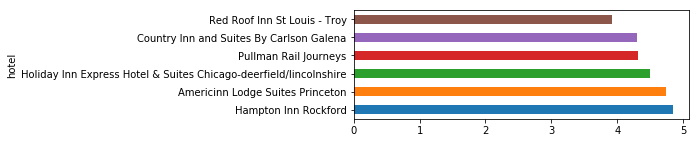

In [18]:
top = 6
to_plot3 =  df_senti_review_rate['mean'][df_senti_review_rate['count'] > 10]
to_plot3 = to_plot3.sort_values(ascending = False)[:top]
to_plot3.plot(kind = 'barh', figsize=(6, 2))

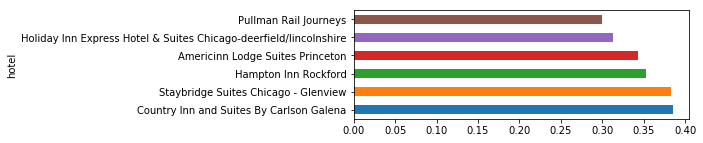

In [19]:
to_plot4 =  df_senti_sentiment_score['mean'][df_senti_sentiment_score['count'] > 10]
to_plot4 = to_plot4.sort_values(ascending = False)[:top]
to_plot4.plot(kind = 'barh', figsize=(6, 2))

# Recommend hotels

In [20]:
df_raw2 = pd.read_csv('https://raw.githubusercontent.com/tangming2008/datasets/master/datasets/metis_class/7282_1.csv')
df_raw2.columns = ['address', 'categories', 'city', 'country', 'latitude', 'longitude', 'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded', 'reviews.doRecommend', 'reviews.id', 'reviews.rating', 'reviews.text', 'reviews.title','reviews.userCity','reviews.username','reviews.userProvince']
cols = ['address','city', 'name', 'province', 'reviews.rating', 'reviews.text']#, 'reviews.title']
df_raw2 = df_raw2.loc[:,cols]
df_raw2.columns = ['address', 'city', 'tags', 'province', 'reviews_rating', 'Description']#, 'reviews_title']
# df_raw2.columns = ['address', 'city', 'hotel_name', 'province', 'reviews_rating', 'review_content']

df_raw2 = df_raw2[pd.notnull(df_raw2['reviews_rating'])]
df_raw2 = df_raw2[pd.notnull(df_raw2['Description'])]
df_raw2 = df_raw2[pd.notnull(df_raw2['province'])]
df_raw2 = df_raw2[pd.notnull(df_raw2['tags'])]

In [22]:
test_state = 'IL'

list_hotel_train = []
list_hotel_test = []
list_address_train = []
list_address_test = []
list_content_train = []
list_content_test = []


for item in df_raw2[df_raw2['province'] != test_state]['Description']:
        list_content_train.append(item)
for item in df_raw2[df_raw2['province'] != test_state]['tags']:
        list_hotel_train.append(item)
for item in df_raw2[df_raw2['province'] != test_state]['address']:
        list_address_train.append(item)
        
for item in df_raw2[df_raw2['province'] == test_state]['Description']:
        list_content_test.append(item)
for item in df_raw2[df_raw2['province'] == test_state]['tags']:
        list_hotel_test.append(item)
for item in df_raw2[df_raw2['province'] == test_state]['address']:
        list_address_test.append(item)

df_raw2[df_raw2['province'] == 'IL'].head(2)

,address,city,tags,province,reviews_rating,Description
2596,855 Pasquinelli Dr,Westmont,Extended Stay America - Chicago - Westmont - O...,IL,2.0,Hotel amenities are really not good. We took e...
2597,855 Pasquinelli Dr,Westmont,Extended Stay America - Chicago - Westmont - O...,IL,5.0,It was relaxing


In [24]:
print('list_hotel_train --', len(list_hotel_train))
print('list_address_train --', len(list_address_train))
print('list_content_train --', len(list_content_train))

print('list_hotel_test --', len(list_hotel_test))
print('list_address_test --', len(list_address_test))
print('list_content_test --', len(list_content_test))

list_hotel_train -- 34442
list_address_train -- 34442
list_content_train -- 34442
list_hotel_test -- 586
list_address_test -- 586
list_content_test -- 586


In [25]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import numpy as np
import nltk
import os
from sklearn import datasets

In [26]:
ng_train = list_content_train

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

cv_data = count_vectorizer.fit_transform(ng_train)
tfidf_data = tfidf_vectorizer.fit_transform(ng_train)

In [28]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
            # print('topic --', topic)
            # print('topic_names --', topic_names)
        else:
            print("\nTopic ", ix)
            print('topic --', topic)
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [29]:
from sklearn.decomposition import NMF, TruncatedSVD

n_comp = 5
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_cv_data = nmf_cv.fit_transform(cv_data)

In [30]:
head = 5

In [31]:
display_topics(lsa_tfidf,count_vectorizer.get_feature_names(),head)


Topic  0
great, room, hotel, nice, stay

Topic  1
businesswith yp, visitors united, yp visitors, yp, united statesand

Topic  2
great, great stay, great location, great place, great hotel

Topic  3
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx, service, excellent, ok, great stay

Topic  4
good, great, good location, location, breakfast good


In [32]:
display_topics(lsa_cv,count_vectorizer.get_feature_names(),head)


Topic  0
room, hotel, stay, staff, clean

Topic  1
room, bed, desk, did, door

Topic  2
hotel, room, told, did, booked

Topic  3
great, stay, place, time, service

Topic  4
stay, night, place, nice, place stay


In [33]:
display_topics(nmf_cv,count_vectorizer.get_feature_names(),head)


Topic  0
hotel, rooms, night, stayed, old

Topic  1
room, bed, desk, night, did

Topic  2
clean, staff, breakfast, nice, good

Topic  3
great, location, service, staff, great location

Topic  4
stay, place, night, place stay, time


In [34]:
from sklearn.neighbors import NearestNeighbors
new_data = list_content_test
# new_data

In [ ]:
def get_recommendations(first_article, model, vectorizer, training_vectors):
    new_vec = model.transform(
        vectorizer.transform([first_article]))
    nn = NearestNeighbors(n_neighbors=5, metric='cosine', algorithm='brute')
    nn.fit(training_vectors)
    results = nn.kneighbors(new_vec)
    return results[1][0]

print(get_recommendations(new_data[0], lsa_cv, count_vectorizer, lsa_cv_data))

In [ ]:
def print_recommendations(first_article,recommend_list):
    print(first_article)
    print('\n------\n')
    for resp in recommend_list:
        print('\n --- Result --- \n')
        print(ng_train[resp])

test_id = 1
rec_list = get_recommendations(new_data[test_id], lsa_cv, count_vectorizer, lsa_cv_data)

# print_recommendations(new_data[0],rec_list)

print('How many hotels will be recommended? --', len(rec_list))
print('How many hotels in the test/recommend database? --', len(list_hotel_test), '\n')

print('Tested hotel: \n')
print('Hotel name --', list_hotel_test[test_id], ' | ', list_address_test[test_id])
print('Review content --', new_data[test_id], '\n')

print('Recommended hotels: \n')
n = 0
for i in rec_list:
    # print(i)
    # print(n)
    n = n + 1
    print(n, ' Hotel name--', list_hotel_train[i], ' | ', list_address_train[i])
    print('    Review content --', list_content_train[i], '\n')

In this example, the recommender would focus on the key word of 'relaxing' and successfully find hotels with similar comments. In this case, 'relaxing' can be regarded as a topic during modeling.